# I Control System Design of a 3-Axis Gimbal
## II สมาชิกกลุ่ม 
    - นาย ณัฐพล สุวรรณสว่าง 64340500019
    - นาย พันธวิศ อิสโร 64340500042
    - นาย ทักดนัย หลำพุกกานนท์ 64340500059
    - นาย วิศรุต ปานแสง 64340500073

## III วัตถุประสงค์
    1. เพื่อพัฒนาระบบควบคุมโดยใช้ การควบคุม Linear parameter-varying (LPV) สำหรับ Gimbal 3 แกน
    2. เพื่อพัฒนาระบบควบคุม จากการได้แบบจำลองทางคณิตศาสตร์สำหรับเครื่องกล Dynamic ของ Gimbal 3 แกน 
    3. เพื่อให้ได้โมเดล gimbal ทำ Lagrange method สำหรับการคำนวณตัวควบคุม จะหาได้ 2 วิธี
        3.1 ซึ่งโมเดล LPV ร่วมกับการทำ Linear Matrix Inequalities (LMIs) เพิ่มประสิทธิภาพ
        3.2 การทำ Forward - Inverse Kinematics และ path generation algorithm
        3.3 การนำ sensor กลับมา feedback ให้ระบบ เพื่อแก้ไข ข้อผิดพลาดที่เกิดขึ้น*****

## IV รายละเอียดโครงงาน  
Gimbal เป็นอุปกรณ์ที่แม่นยำซึ่งใช้สำหรับควบคุมการวางแนวในพื้นที่ 3 มิติ สามารถใช้กับติดตั้งกับกล้องเพื่อรักษาแนวระนาบขณะถือด้วยมือหรือติดตั้งบนวัตถุต่างๆ ตัวอย่างที่เห็นได้ทั่วไปในอุตสาหกรรมภาพยนตร์พยายาม.นอกจากนี้ยังใช้กันอย่างแพร่หลายสำหรับการทดสอบเทคโนโลยีเซ็นเซอร์แบบฮาร์ดแวร์ในวงตั้งแต่การทดสอบ Gyroscope ของ มือถือเพื่อทดสอบอุปกรณ์นำทางที่สำคัญสำหรับยานอวกาศ โดยจะเริ่มทำการศึกษาการทำงาน ทั้งหมดของ Gimbal 3 แกน

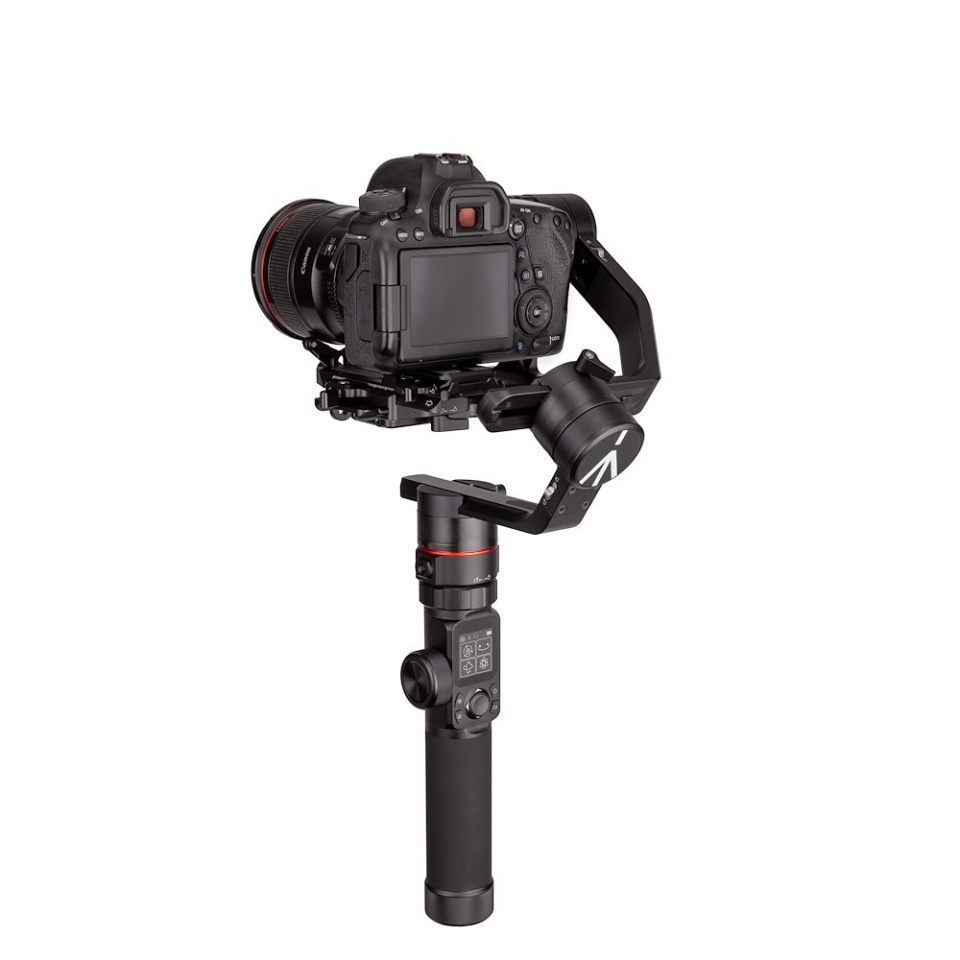


## V Literature Review
##     3 Axie Gimbal Forward Kinematics
ขั้นตอนแรกในแนวทางนี้คือ การหา Forward Kinematics ของระบบ  ซึ่งสามารถทำได้จาก การคำนวณหาพารามิเตอร์ต่างในแต่ละลิงก์ตาม
Denavit-Hartenberg Convention แต่อันดับแรกเราต้องกำหนด frame อ้างอิงและของแบบจำลอง Gimbal 3 แกน ตามหลักการในการวางเฟรมดังนี้

    - Choose axis z_{i} along the axis of Link Joint i + 1, the motor axis of rotation.
    - Choose axis x_{i} along the common normal to axes z_{i-1} and z_{i}.
    - Choose axis y_{i} so as to complete a right-handed frame.
    - For Frame 0, only the direction of axis z_{0} is specified, x_{o} can be randomly selected.
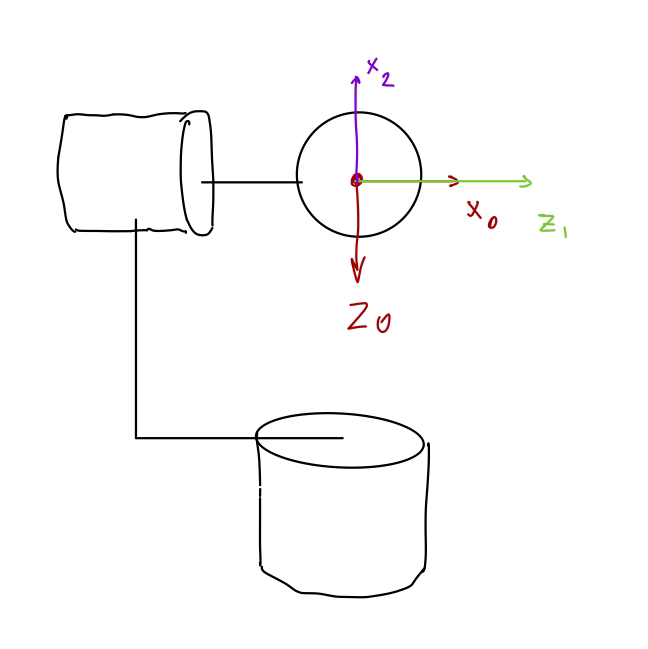

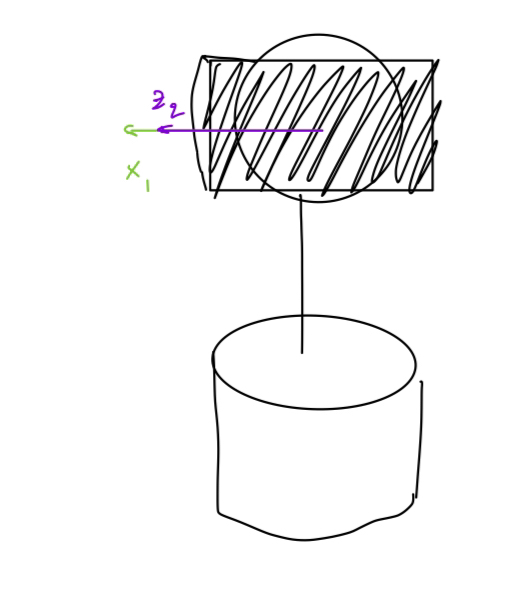

พารามิเตอร์ทั้งสี่นี้เพียงพอที่จะกำหนดแต่ละลิงก์ให้สัมพันธ์กับลิงก์ก่อนหน้า เหล่านี้
พารามิเตอร์ถูกกำหนดดังนี้:

    a_{i}: distance along x_{i} from Oi to the intersection of the x_{i} and z_{i-1} axes.
    d_{i}: distance along z_{i-1} from O_{i-1} to the intersection of the x_{i} and z_{i-1} axes.
    α_{i}: angle between z_{i-1} and z_{i} measured about x_{i}.
    θ_{i}: angle between x_{i-1} and x_{i} measured about z_{i-1}.

และหา homogeneous transformation matrix หลังจากได้ DH parameters


$$
A^i_{_i-1} =
\begin{bmatrix}
\cos(\theta_i) & -\sin(\theta_i)\cos(\alpha_i)  & \sin(\theta_i)\sin(\alpha_i)  & \alpha_i\cos(\theta_i) \\
\sin(\theta_i) & \cos(\theta_i)\cos(\alpha_i)   & -\cos(\theta_i)\sin(\alpha_i) & \alpha_i\sin(\theta_i) \\
0              & \sin(\alpha_i)                 & \cos(\alpha_i)                & d\_i                   \\
0              & 0                              & 0                             & 1                       \\
\end{bmatrix}
$$


เนื่องจากจุด origin ทั้งหมดอยู่ในจุดเดียวกันกับที่แกนมอเตอร์ทั้งหมดตัดกัน องค์ประกอบทั้งหมด ai และ di จึงเป็นศูนย์ ซึ่งหมายความว่าการแปลระหว่างลิงก์ไม่ได้ถูกนำมาพิจารณา นอกจากนี้การหมุนของแต่ละลิงก์ยังได้รับจากตัวแปร qi และต้องทำการ offset link 1 และ 2 

homogeneous transform matrix สำหรับแต่ละลิงค์สามารถหาได้โดยการแทนที่ DH Parameter ของแต่ละ link

$$
T^3_{_0}(q) = A^1_{_0}(q_1) A^2_{_1}(q_2) A^3_{_2}(q_3)
$$

$$
T^3_{_0}(q) =
\begin{bmatrix}
-c_1 s_3 - c_3 s_1 s_2 &  s_1 s_2 s_3 - c_1 c_3         & -c_2 s_1  & 0 \\
c_1 c_3 s_2 - s_1 s_3  & -c_3 s_1 - c_1 s_2 s_3         & c_1 c_2 & 0 \\
-c_2 C_3               & c_2 s_3                        & s_2                & 0                  \\
0                      & 0                              & 0                             & 1                       \\
\end{bmatrix}
$$


## Dynamical Model
Dynamic ของระบบ 3 axie gimbal ถือเป็นสิ่งสำคัญในการทำความเข้าใจและควบคุมพฤติกรรมของหุ่น โดยเฉพาะอย่างยิ่งในการใช้งาน เช่น กล้องรักษาการ โดรน หรือยานอวกาศ นี่คือเหตุผลว่าทำไมต้องทำการหา Dynamic ของหุ่น

Newton’s Law of motion 


$$ 

B(q)\ddot{q} + C(q, \dot{q})\dot{q} + F_v\dot{q} + g(q) = \tau \ 

$$


   B Global inertia tensor of the gimbal, 3x3 symmetrical matrix.
    
   C  Coriolis matrix, 3x3 matrix.

   F_v  Viscous friction coefficient, 3x3 diagonal matrix.

   g(q)  Torques present in the links joints by the effect of gravity, 3x1 vector.
    
   \tau Input torques given by the actuators, 3x1 vector.


$$ 

\ddot{q} = B(q)^-1 [\tau \ - C(q, \dot{q})\dot{q} - F_v\dot{q} - g(q) ]

$$


เนื่องจากเราสามารถหา Output ได้จากการทำ multi-body serial-link system ได้และมี frame ที่ได้จาก DH (DH convention)บวกกับการทำ Lagrange method ด้วยทั้งหมดนี้เราสามารถหา สมการ inertia tensor , Coriolis matrix และ gravity term ซึ่งสามารถทำได้หลายวิธี ดังนี้. 

ขั้นแรกคือการคำนวณหา inertia tensor  ซึ่งหลังจากที่หา Lagrangian equation เราจะได้สมการดังนี้:

<center>

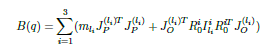
<center>





    R คือ Rotation matrix.
    m คือ มวลของวัตถุ ของ lnk i
    I คือ Inertia tensor ของ lnk i
    Jo The Rotational Jacobian
    Jp The Translational Jacobian 
<center>

![Screenshot 2023-11-03 191006.png](<attachment:Screenshot 2023-11-03 191006.png>) 

![Screenshot 2023-11-03 191113.png](<attachment:Screenshot 2023-11-03 191113.png>) 

![Screenshot 2023-11-03 191143.png](<attachment:Screenshot 2023-11-03 191143.png>)
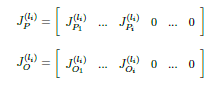
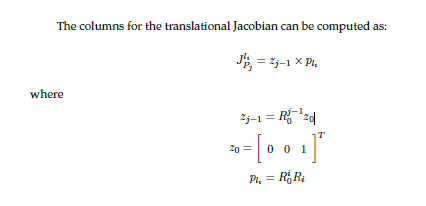
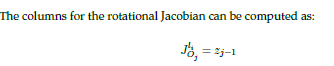

หลังจากได้สมการ ของ inertia tensor matrix ของ Gimbal ก็ทำการหา Coriolis matrix ต่อ 

<center>

![Screenshot 2023-11-03 191438.png](<attachment:Screenshot 2023-11-03 191438.png>)
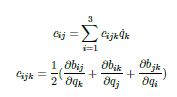

Note* b_ij คือสมาชิกของ B(q) ส่วนองค์ประกอบสุดท้ายที่ Lagrange method หามาใน serial-links สามารถทำการหา g(q) ต่อได้
<center>

![Screenshot 2023-11-03 191914.png](<attachment:Screenshot 2023-11-03 191914.png>) </center>

 องค์ประกอบ g ในสมการ คือค่าคงที่ของความเร่งด้วยแรงโน้มถ่วง (gravity acceleration constant) และมีค่าเป็นบวก เนื่องจากแกน z ของแกน 0 ชี้ลงมาด้านล่าง
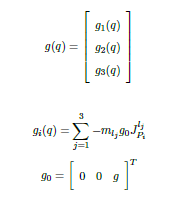

ส่วนสุดท้ายในโมเดลในสมการ ที่ต้องการหาคือ viscous friction matrix (Fv) มันไม่สามารถคำนวณทฤษฎีได้และค่าของต้องถูกกำหนด จากการการระบุพารามิเตอร์โดยใช้ข้อมูล input-output data อย่างไรก็ตาม อย่างไรก็ตามมันเป็นเรื่องทั่วไป
เป็นที่ทราบกันว่ารูปแบบนี้เป็น diagonal matrix ที่มีองค์ประกอบคงที่และเนื่องมาจากโครงสร้างของ
gimbal 3 แกน สามารถถือว่าองค์ประกอบทั้งสามนั้นเท่ากันได้ สมมติฐานสุดท้ายนี้ก็คือ
ขึ้นอยู่กับข้อเท็จจริงที่ว่า actuator ทั้งสามตัวนั้นเป็นมอเตอร์เกียร์ตัวเดียวกันทุกประการ ดังนั้นการเสียดสีจึงเกิดขึ้น ดังนี้ค่าที่ได้จะเหมือนหรือต่างกันไม่มาก

จากทั้งหมดนี้ก็ ก็สามารถทราบค่าของแต่ละตัวแปรได้ และนำมาทำการ simulate และทำ Control design ต่อ

##     3 Axie Gimbal Inverse Kinematics
การคำนวณตำแหน่งของกล้องถ่ายภาพในปริภูมิ 3 มิติ สามารถทำได้โดยใช้คณิตศาสตร์เชิงมุม (Inverse Kinematics) ซึ่งเป็นเทคนิคการคำนวณมุมของมอเตอร์แต่ละแกนจากตำแหน่งของกล้องถ่ายภาพที่ต้องการ
สำหรับระบบกันสั่น 3 แกนนั้น การคำนวณ Inverse Kinematics สามารถแบ่งออกเป็น 2 ส่วน ได้แก่

1.การคำนวณมุมของมอเตอร์แกน yaw และ pitch เพื่อให้กล้องถ่ายภาพหันไปในทิศทางที่ต้องการ

2.การคำนวณมุมของมอเตอร์แกน roll เพื่อให้กล้องถ่ายภาพอยู่ในระดับที่ต้องการ

การคำนวณมุมของมอเตอร์แกน yaw และ pitch นั้น สามารถทำได้โดยใช้สูตรการแปลงจากระบบพิกัดคาร์ทีเซียน (Cartesian Coordinates) ไปเป็นระบบพิกัดทรงกลม (Spherical Coordinates) โดยระบบพิกัดคาร์ทีเซียนนั้นจะเป็นการแทนตำแหน่งของกล้องถ่ายภาพในปริภูมิ 3 มิติ ส่วนระบบพิกัดทรงกลมนั้นจะเป็นการแทนตำแหน่งของกล้องถ่ายภาพด้วยมุม azimuth และ elevation ได้โดยสูตรต่อไปนี้
<center>

![Screenshot 2023-11-03 194138.png](<attachment:Screenshot 2023-11-03 194138.png>) </center>

พิกัดทรงกลมประกอบด้วย 3 ค่า ได้แก่ มุม azimuth, มุม elevation, และระยะทางจากจุดกำเนิด
มุม azimuth กำหนดทิศทางของจุดที่ต้องการชี้ไปที่
มุม elevation กำหนดระดับความสูงของจุดที่ต้องการชี้ไปที่
ระยะทางจากจุดกำเนิดกำหนดระยะห่างจากจุดกำเนิดถึงจุดที่ต้องการชี้ไปที่

<center>

![Screenshot 2023-11-03 194629.png](<attachment:Screenshot 2023-11-03 194629.png>)</center>

ขั้นตอนต่อไปคือการหามุมของมอเตอร์แต่ละตัว โดยใช้ความสัมพันธ์ต่อไปนี้
<center>

 ![Screenshot 2023-11-03 194816.png](<attachment:Screenshot 2023-11-03 194816.png>) </center>

โดยที่

q1 คือมุมของมอเตอร์แกน Roll

q2 คือมุมของมอเตอร์แกน Pitch


ส่วนการคำนวณมุมของมอเตอร์แกน roll นั้น สามารถทำได้โดยสูตรต่อไปนี้
<center>  

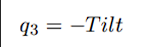 </center> 
โดยที่ tilt angle นั้นคือมุมเอียงของกล้องถ่ายภาพจากแนวระนาบ
<center>  

![Screenshot 2023-11-03 195124.png](<attachment:Screenshot 2023-11-03 195124.png>)</center>  

เมื่อได้ค่ามุมของมอเตอร์แต่ละตัวแล้ว ก็สามารถสั่งให้มอเตอร์หมุนไปที่มุมนั้นๆ เพื่อให้กล้องหันไปที่ตำแหน่งที่ต้องการได้
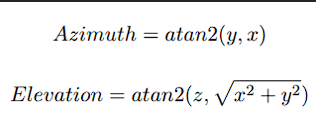
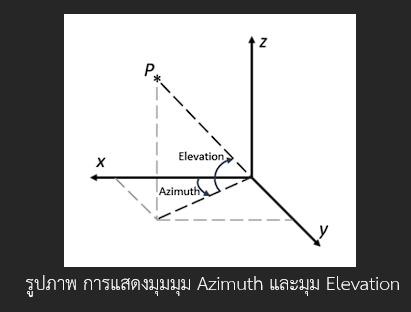
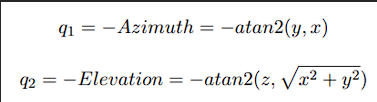
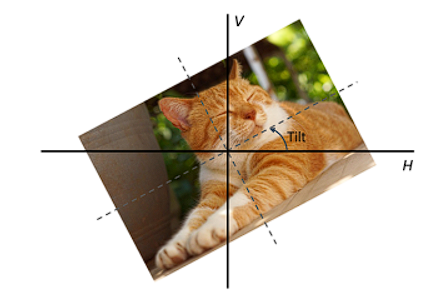

## Trajector Generation
ทำการแปลงชุดพิกัด xyz ให้เป็นชุดของ q เพื่อกำหนด path การเคลื่อนที่ของ gimbal จาก q_o to q_f นอกจากนี้เราต้องคำนึงถึงเวลาในการทำงานระหว่างการเคลื่อนที่เพื่อป้องกันไม่ให้เกิดการชนกันระหว่างการเคลื่อนที่ เนื่องจาก gimbal มีแกนการเคลื่อนที่ที่คงที่และมีข้อจำกัดของ workspaces เมื่อต้องการเร่งความเร็วอย่างราบรื่นระหว่างวิถี การตัดสินใจที่ดีที่สุดคือเลือกเส้นโค้งลำดับที่ 5 ดังนี้
$$
    S(t) = At^5 + Bt^4 + Ct^3 + Dt^2 + Et + F
$$
$$
    \dot{S}(t) = 5At^4 + 4Bt^3 + 3Ct^2 + Dt + E
$$
$$
    \ddot{S}(t) = 20At^3 + 12Bt^2 + 6Ct + D
$$
การเคลื่อนไหวของกล้องที่ราบรื่นเป็นเกณฑ์สำคัญในการเลือก spline เพื่อให้ได้การเคลื่อนที่ที่ราบรื่น เราจึงจำเป็นต้องออกแบบให้ระบบ trajectory มีความต่อเนื่องกัน โดยการกำหนด initial condition [ S_i(t) ] และ final condition [ S_i-1(t) ] ของเส้นทาง

## VI เกี่ยวข้อกับหัวข้อในรายวิชาหัวข้อไหนบ้าง
    - Forward Kinematics 
    - Invesre Kinematics 
    - Dynamic (Jacobian)
    - Trajectory Generation

## VII System diagram/System overview
<center>

![Screenshot 2023-11-03 195627-2.png](<attachment:Screenshot 2023-11-03 195627-2.png>)

3-Axis Gimbal control system


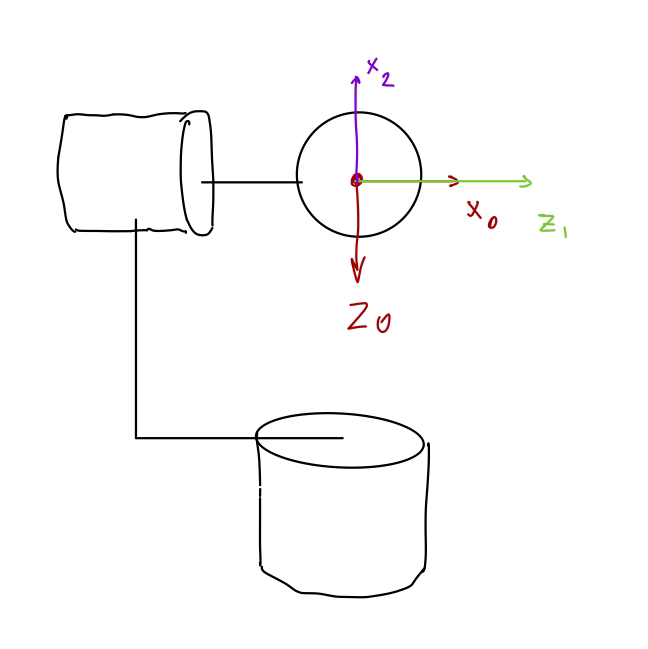 

การวางเฟรม 3 Axie Gimbal (Front View)

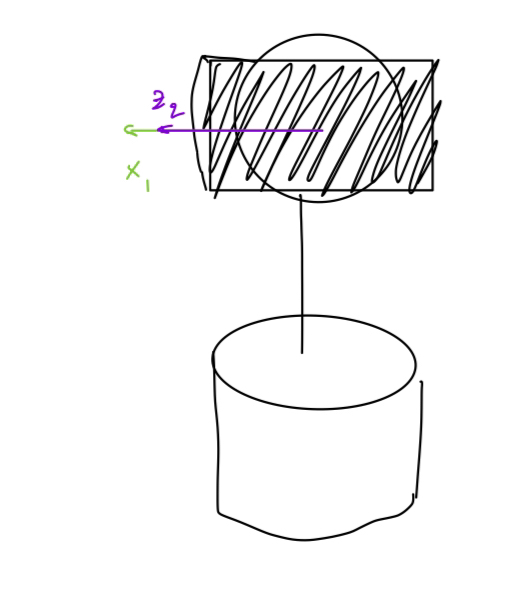

การวางเฟรม 3 Axie Gimbal (Side View)
</center>


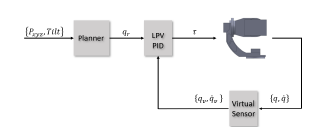

## VIII ผลการศึกษาที่คาดหวัง
    1. สามารถพัฒนาระบบควบคุมโดยใช้ การควบคุม Linear parameter-varying (LPV) สำหรับ Gimbal 3 แกนได้อย่างแม่นยำและมีประสิทธิภาพ

    2. สามารถพัฒนาระบบควบคุม จากแบบจำลองทางคณิตศาสตร์สำหรับเครื่องกล Dynamic ของ Gimbal 3 

    3. ได้โมเดล gimbal วิธีการที่เลือกคือทำตาม Largrange formulation สำหรับการคำนวณตัวควบคุม จะหาได้ 2 วิธี3.1 ซึ่งโมเดล LPV ร่วมกับการทำ Linear Matrix Inequalities (LMIs) เพิ่มประสิทธิภาพ3.2 การทำ Forward - Inverse Kinematics และ path generation algorithm3.3 การนำ sensor กลับมา feedback ให้ระบบ เพื่อแก้ไข ข้อผิดพลาดที่เกิดขึ้น

